In [1]:
# Import des modules Python nécessaires
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.utils import to_categorical
import numpy as np
from matplotlib import pyplot as plt
import os
import cv2
from tqdm import tqdm

In [2]:
!pwd

/home/ayoub/Projects/MINI-PROJET-teled/DL-tree3BinaryClass


In [3]:
# Data
images = "./train/"
labels = ['0', '1', '2', '3', '4', '5', '6']
# for label in labels:
#     path = os.path.join(images, label)
#     for img in os.listdir(path):
#         img_array = cv2.imread(os.path.join(path,img))
#         plt.imshow(img_array)
#         plt.show()

In [4]:
training_data = []


def create_training_data():
    for label in labels:
        path = os.path.join(images, label)
        class_num = labels.index(label)

        for img in tqdm(os.listdir(path)):
            try:
                img_array = cv2.imread(os.path.join(path, img))
                new_array = cv2.resize(img_array, (256, 256))
                training_data.append([new_array, class_num])
            except Exception:
                pass


create_training_data()

100%|██████████| 24/24 [00:00<00:00, 86.32it/s]


In [5]:
X = []
y = []

for features, label in training_data:
    X.append(features)
    y.append(label)

X = np.array(X).reshape(-1, 256, 256, 3)
y = np.array(y)
y = to_categorical(y)

print("x_train est de dimension: {}".format(X.shape))
print("y_train est de dimension: {}".format(y.shape))

x_train est de dimension: (450, 256, 256, 3)
y_train est de dimension: (450, 7)


In [6]:
CNN = Sequential([Conv2D(16, (3, 3), padding='same', activation='relu', input_shape=(256,256,3)),
                  MaxPooling2D((3, 3)),
                  Conv2D(32, (3, 3), padding='same', activation='relu'),
                  MaxPooling2D((3, 3)),
                  Conv2D(64, (3, 3), padding='same', activation='relu'),
                  MaxPooling2D((3, 3)),
                  Flatten(),
                  Dense(64, activation='relu'),
                  Dense(7, activation='softmax')])
CNN.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 256, 256, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 85, 85, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 85, 85, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 9, 9, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 5184)              0

On va essayer 

In [7]:
CNN.compile(optimizer='rmsprop',
            loss='categorical_crossentropy',
            metrics=['accuracy'])

history_CNN = CNN.fit(X, y, verbose=True, epochs=30, validation_split=0.3)

Epoch 1/30
10/10 [==============================] - 11s 613ms/step - loss: 39.9697 - accuracy: 0.5429 - val_loss: 62.9123 - val_accuracy: 0.1111
Epoch 2/30
10/10 [==============================] - 6s 579ms/step - loss: 0.9585 - accuracy: 0.8698 - val_loss: 59.2517 - val_accuracy: 0.1037
Epoch 3/30
10/10 [==============================] - 6s 578ms/step - loss: 2.2187 - accuracy: 0.8095 - val_loss: 91.4596 - val_accuracy: 0.1111
Epoch 4/30
10/10 [==============================] - 6s 572ms/step - loss: 3.5490 - accuracy: 0.7968 - val_loss: 25.6770 - val_accuracy: 0.1111
Epoch 5/30
10/10 [==============================] - 5s 560ms/step - loss: 0.7240 - accuracy: 0.8222 - val_loss: 17.5986 - val_accuracy: 0.1111
Epoch 6/30
10/10 [==============================] - 5s 541ms/step - loss: 0.1094 - accuracy: 0.9587 - val_loss: 20.1927 - val_accuracy: 0.1111
Epoch 7/30
10/10 [==============================] - 6s 553ms/step - loss: 0.5836 - accuracy: 0.9016 - val_loss: 10.0233 - val_accuracy: 0.10

In [8]:
def prepare(filepath):
    IMG_SIZE = 256
    img_array = cv2.imread(filepath)
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 3)

## We predict on image (not seen before)
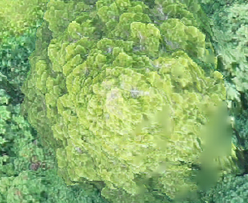

In [9]:
prediction = CNN.predict([prepare('./test/2.png')])
print(np.argmax(prediction))

2


YEES It worked!